# Combine covariance matrices for different data types and materials

In [1]:
import numpy as np

In [2]:
import sandy

In [3]:
import logging
logging.getLogger().setLevel(logging.WARN)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

## Load data from Pu239 (xs and nubar)

In [5]:
e6 = sandy.get_endf6_file("jeff_33", "xs", 942390)
err = e6.get_errorr(errorr_kws=dict(ek=[1e-2, 1e1, 1e7]), err=1)
err_pu9 = err['errorr33'].add_sections(err['errorr31'].data)

## Load data from Pu241 (xs and nubar)

In [6]:
e6 = sandy.get_endf6_file("jeff_33", "xs", 942410)
err = e6.get_errorr(errorr_kws=dict(ek=[1e-2, 1e1, 1e7]), err=1)
err_pu0 = err['errorr33'].add_sections(err['errorr31'].data)

## Merge Pu239 and Pu241 xs and nubar covariance matrices

In [7]:
err = err_pu9.add_sections(err_pu0.data)
cov = err.get_cov()

In [8]:
err

MAT   MF  MT 
9437  1   451     9.423900+4 2.369986+2          6          0  ...
      3   1       9.423900+4 0.000000+0          0          0  ...
          2       9.423900+4 0.000000+0          0          0  ...
          4       9.423900+4 0.000000+0          0          0  ...
          16      9.423900+4 0.000000+0          0          0  ...
                                       ...                        
9443  33  91      9.424100+4 2.389860+2          0          0  ...
          102     9.424100+4 2.389860+2          0          0  ...
          452     9.424100+4 2.389860+2          0          0  ...
          455     9.424100+4 2.389860+2          0          0  ...
          456     9.424100+4 2.389860+2          0          0  ...
Length: 124, dtype: object

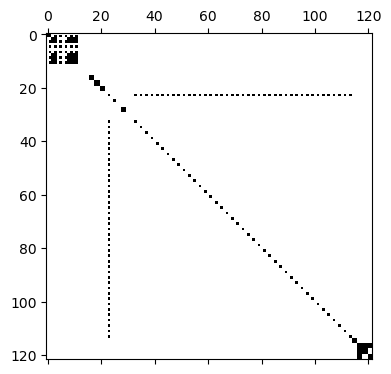

In [9]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
ax.spy(cov.data)
fig.tight_layout()

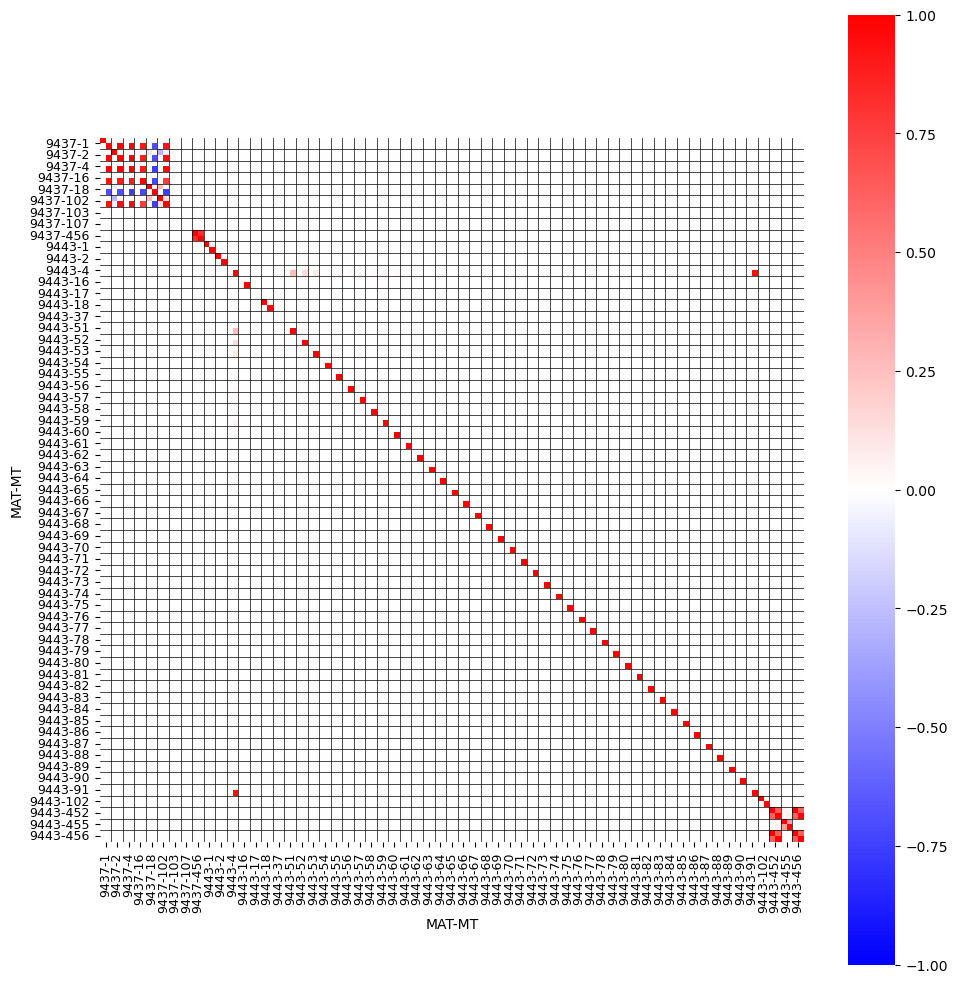

In [10]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
ax.set_aspect("equal")
sns.heatmap(cov.get_corr().data, cmap="bwr", vmin=-1, vmax=1)

lbl = [f"{mat}-{mt}" for i, (mat, mt) in cov.data.index.to_frame()[["MAT", "MT"]].drop_duplicates().reset_index(drop=True).iterrows()]
ne = cov.data.index.size / len(lbl)
ticks = np.arange(ne, cov.data.index.size + ne, ne)
ax.set_xticks(ticks - ne/2)
ax.set_xticklabels(lbl, size=9)
ax.set_yticks(ticks - ne/2)
ax.set_yticklabels(lbl, size=9)

for x in np.arange(ne, cov.data.index.size, ne):
    ax.axvline(x, color="k", lw=0.5)
    ax.axhline(x, color="k", lw=0.5)
ax.set(
    xlabel="MAT-MT",
    ylabel="MAT-MT",
)

fig.tight_layout()